In [1]:
# Standard ds imports:
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# Custom Modules
import os
import env
import acquire
import prepare
import explore
import model

In [123]:
df = acquire.get_telco_data()

In [124]:
df.churn.value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

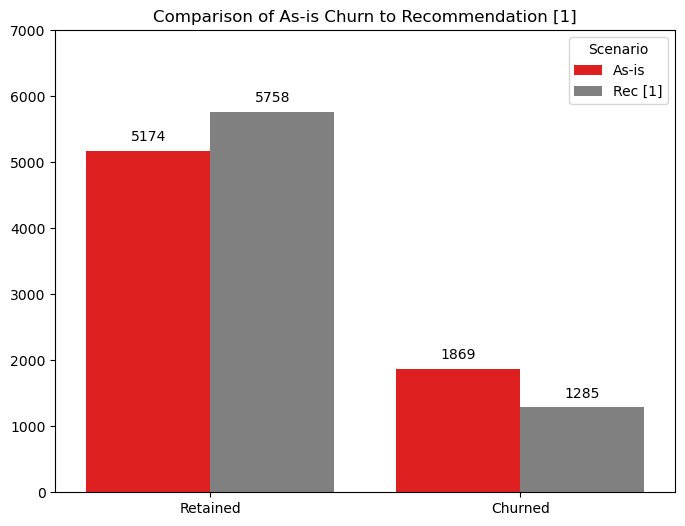

In [131]:

# Actual value counts
actual_counts = {'Retained': 5174, 'Churned': 1869}

# Hypothetical value counts
recommendation_1_counts = {'Retained': 5758, 'Churned': 1285}

# Combine actual and hypothetical counts into a DataFrame
combined_counts_df = pd.DataFrame({
    'Churn': list(actual_counts.keys()) * 2,
    'Scenario': ['As-is'] * 2 + ['Rec [1]'] * 2,
    'Count': list(actual_counts.values()) + list(recommendation_1_counts.values())
})

# Define a custom color palette
custom_palette = {'As-is': ('red'), 'Rec [1]': ('grey')}

# Create a bar plot with combined counts using the custom palette
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=combined_counts_df, x='Churn', y='Count', hue='Scenario', palette=custom_palette)
plt.title('Comparison of As-is Churn to Recommendation [1]')
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')  # Remove y-axis label

# Set y-axis limit to 7000
plt.ylim(0, 7000)

# Add annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.show()


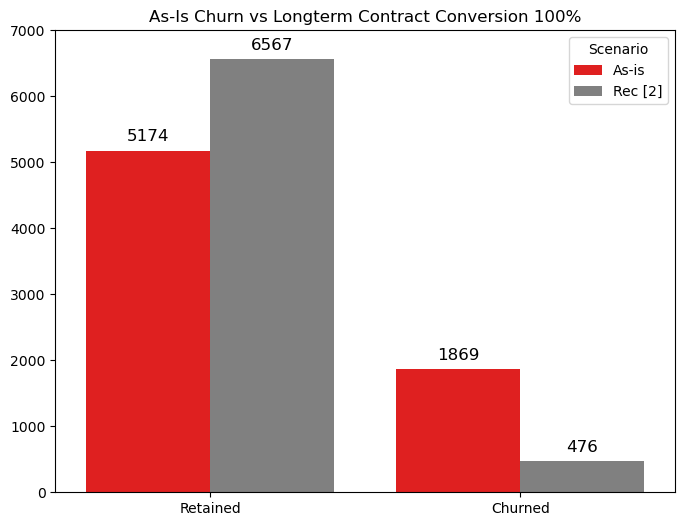

In [133]:
# Actual value counts
actual_counts = {'Retained': 5174, 'Churned': 1869}

# Hypothetical value counts
recommendation_2_counts = {'Retained': 6567, 'Churned': 476}

# Combine actual and hypothetical counts into a DataFrame
combined_counts_df = pd.DataFrame({
    'Churn': list(actual_counts.keys()) * 2,
    'Scenario': ['As-is'] * 2 + ['Rec [2]'] * 2,
    'Count': list(actual_counts.values()) + list(recommendation_2_counts.values())
})

# Set target = 'churn'
target = 'churn'

# Define a custom color palette
custom_palette = {'As-is': ('red'), 'Rec [2]': ('grey')}

# Create a bar plot with combined counts using the custom palette
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=combined_counts_df, x='Churn', y='Count', hue='Scenario', palette=custom_palette)
plt.ylim(0, 7000)  # Set y-axis limit
plt.xlabel('')
plt.ylabel('')  # Remove y-axis label
# Title of plot
plt.title('As-Is Churn vs Longterm Contract Conversion 100%')

# Add annotations for the counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.show()


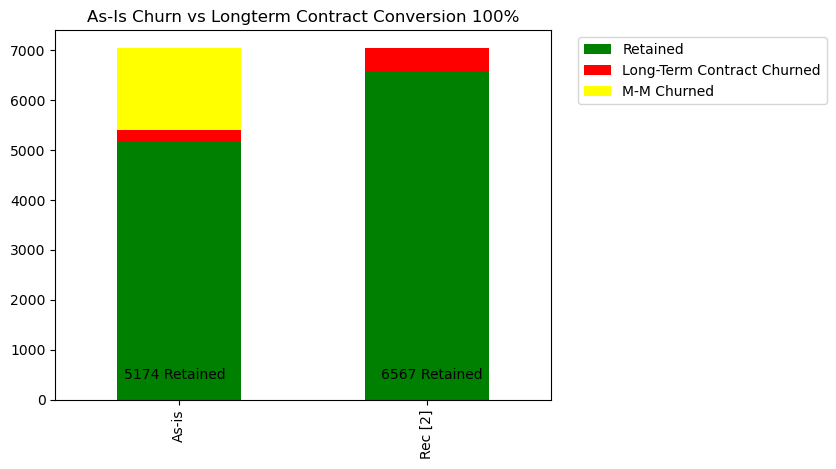

In [138]:

# Create DataFrame
df = pd.DataFrame({'Retained': [5174, 6567],
                   'Long-Term Contract Churned': [214, 476],
                   'M-M Churned': [1655, 0]},
                  index=['As-is', 'Rec [2]'])

# Create stacked bar chart
ax = df.plot(kind='bar', stacked=True, color=['green', 'red', 'yellow'])

# Title of plot
plt.title('As-Is Churn vs Longterm Contract Conversion 100%')

# Move the legend to the upper right corner outside the plot
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

# Add annotation for 'Retained' count in 'As-is' scenario
as_is_retained = df.loc['As-is', 'Retained']
ax.annotate(f'{as_is_retained} Retained', 
            (0, as_is_retained / 2), 
            ha='center', va='center', fontsize=10, color='black', xytext=(-3, -75), textcoords='offset points')

# Add annotation for 'Retained' count in 'Rec [2]' scenario
rec_2_retained = df.loc['Rec [2]', 'Retained']
ax.annotate(f'{rec_2_retained} Retained', 
            (1, rec_2_retained / 2), 
            ha='center', va='center', fontsize=10, color='black', xytext=(3, -100), textcoords='offset points')

# Show the plot
plt.show()
